In [1]:
import pandas as pd

book_df=pd.read_csv("book.csv",encoding="gb18030")
movie_df=pd.read_csv("movie.csv",encoding="gb18030")

In [5]:
perfectMap_df=pd.read_csv("movie_book_perfectMapping.csv",encoding="gb18030")
perfectMap=[]
def buildPerfectMap(x): perfectMap.append((x['book'],x['movie']))
perfectMap_df.apply(buildPerfectMap,axis=1)
pass

In [6]:
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='gb18030').readlines()]  
    return stopwords 


In [7]:
import jieba

def tokenize(string):
    stopwords = stopwordslist('stop.txt')
    seg_list = jieba.cut(string)
    re_li = []
    for i in seg_list:
        if (not i in stopwords) and len(i)>1:
            re_li.append(i)
    return re_li

def rec2tok(x,dic):
    #x:a record from on DataFrame
    #dic:dictionary that build mappings from record id to tokens
    if not type(x['description']) is str:x['description']=''
    if not type(x['name']) is str:x['name']=''
    dic[x['url']]=tokenize(x['name']+' '+x['description'])

In [8]:
def inc(i,dic):
    #i:a key in dic
    #dic:dic[i]++
    if i in dic: dic[i]+=1
    else: dic[i]=1
    
def tf(tokens):
    tfs={}
    for i in tokens: inc(i,tfs)            
    n=float(len(tokens))
    for i in tfs:tfs[i]/=n
    return tfs
def idf(rec2tok):
    idfs={}
    N=float(len(book_df)+len(movie_df))
    for i in rec2tok:
        s=set(rec2tok[i])
        for j in s:inc(j,idfs)
    for i in idfs:idfs[i]=N/idfs[i]
    return idfs
def tfidf(tokens,idfs):
    ans=tf(tokens)
    s=set(tokens)
    for i in ans:
        ans[i]*=idfs[i]
    return ans 

def invertIndex(forward_index):
    #return a mapping from token to list-of-record-IDs
    ans={}
    for i in forward_index:
        for j in forward_index[i]:
            if j in ans:ans[j].append(i)
            else: ans[j]=[i]
    return ans

In [9]:
import math

# Optional utility
def dotprod(a, b):
    ans=0
    for i in a:
        if i in b: ans+=a[i]*b[i]
    return ans

# Optional utility
def norm(a):
    ans=0
    for i in a:
        ans+=a[i]**2
    return math.sqrt(ans)

In [10]:
book_rec2tok = {}
movie_rec2tok = {}

book_df.apply(lambda x:rec2tok(x,book_rec2tok),axis=1)
movie_df.apply(lambda x:rec2tok(x,movie_rec2tok),axis=1)
book_inv=invertIndex(book_rec2tok)


Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\HP\AppData\Local\Temp\jieba.cache
Loading model cost 2.270 seconds.
Prefix dict has been built succesfully.


In [18]:
book_df

,url,name,description
0,https://book.douban.com/subject/26586492/,火星救援,六天前，马克·沃特尼成为了第一批行走在火星上的人。如今，他也将成为第一个葬身火星的人。一场突...
1,https://book.douban.com/subject/20370889/,霍比特人,在地底的洞府中住着一个霍比特人。比尔博，一个热爱安逸生活的霍比特人，自得其乐地待在袋底洞他的...
2,https://book.douban.com/subject/21328036/,逃离德黑兰,一位传奇的艺术家特工一段真实的历史一份保密17年的中情局档案一个男 人的责任、信心与勇气一个...
3,https://book.douban.com/subject/25836981/,爬出窗外并消失的百岁老人,在经历了充满传奇又匪夷所思的漫长一生后，阿朗·卡尔松栖息于他以为即将成为他在地球上最后一站的...
4,https://book.douban.com/subject/25768151/,为奴十二年,《为奴十二年》是那种距离我们非常遥远，但只要一读，那种莫名的熟悉感就会扑面而来的故事。这也是...
5,https://book.douban.com/subject/25766893/,成为简?奥斯丁,《成为简?奥斯丁》电影同名原著。简?奥斯丁，《傲慢与偏见》《理智与情感》《诺桑觉寺》《劝导》...
6,https://book.douban.com/subject/11588813/,海上钢琴师,天堂的名单里，没有他的名字。他从未出生，从未死亡，从未存在。1900。海上钢琴师。一个传奇中...
7,https://book.douban.com/subject/3175259/,锅匠，裁缝，士兵，间谍,有时候，背叛不为别的，它是一种本能。一个外勤人员的告密搅动了英国情报机构“圆场”得之不易的平...
8,https://book.douban.com/subject/3654604/,天使与魔鬼,虔诚的上帝信徒——欧洲原子核研究组织的杰出科学家列奥纳多·维特勒毕生致力于以科学的手段证明神...
9,https://book.douban.com/subject/1072334/,魔戒前传,“从前有个霍比特人，住在地洞里。”霍比特人是一种比矮人个儿还小的人，善良精明而安分守已。毕尔...


In [11]:
from collections import Counter
idfs_full = dict(Counter(idf(book_rec2tok))+Counter(idf(movie_rec2tok)))
book_weights={i:tfidf(book_rec2tok[i],idfs_full) for i in book_rec2tok}
movie_weights={i:tfidf(movie_rec2tok[i],idfs_full) for i in movie_rec2tok}
movie_norm={i:norm(movie_weights[i]) for i in movie_weights}
book_norm={i:norm(book_weights[i]) for i in book_weights}

In [19]:
book_weights

{'https://book.douban.com/subject/1008988/': {'世态炎凉': 7.6923076923076925,
  '东部': 7.6923076923076925,
  '中西部': 7.6923076923076925,
  '久久': 7.6923076923076925,
  '了不起': 15.384615384615385,
  '人生': 1.8162393162393162,
  '付出': 7.6923076923076925,
  '代价': 15.384615384615385,
  '况味': 7.6923076923076925,
  '发觉': 7.6923076923076925,
  '威尔逊': 7.6923076923076925,
  '尼克': 6.4102564102564115,
  '幢幢': 7.6923076923076925,
  '悲凉': 7.6923076923076925,
  '感到': 2.5641025641025643,
  '挑拨': 7.6923076923076925,
  '故事': 1.076923076923077,
  '杀死': 9.230769230769232,
  '汤姆': 4.102564102564103,
  '盖茨': 46.15384615384615,
  '简单': 1.9230769230769231,
  '老家': 15.384615384615385,
  '这是': 3.8461538461538463,
  '鬼影': 7.6923076923076925},
 'https://book.douban.com/subject/1018136/': {'1984': 1.9417475728155338,
  '一律平等': 1.9417475728155338,
  '一方': 1.9417475728155338,
  '不堪': 1.6181229773462784,
  '专制': 1.9417475728155338,
  '两只': 0.9708737864077669,
  '主人': 2.4271844660194173,
  '乔治': 2.3300970873786406,
  '二十世纪': 

In [12]:
def buildSim(Id,weight,norm,weights,norms,inv,sims):
    #weights : Id->token->weight
    #norms : Id->norm
    for i in weight:
        if i in inv:
            for j in inv[i]:
                if not (j,Id) in sims: sims[(j,Id)]=dotprod(weight,weights[j])/norm/norms[j]

In [13]:
sims={}
for i in movie_weights:
    buildSim(i,movie_weights[i],movie_norm[i],book_weights,book_norm,book_inv,sims)

In [14]:
sims

{('https://book.douban.com/subject/26586492/',
  'https://movie.douban.com/subject/25864085/'): 0.599246994581842,
 ('https://book.douban.com/subject/1128394/',
  'https://movie.douban.com/subject/25864085/'): 0.02768727601188663,
 ('https://book.douban.com/subject/3654604/',
  'https://movie.douban.com/subject/25864085/'): 0.0072667986330126715,
 ('https://book.douban.com/subject/1228110/',
  'https://movie.douban.com/subject/25864085/'): 0.007329822502440866,
 ('https://book.douban.com/subject/1394364/',
  'https://movie.douban.com/subject/25864085/'): 0.01574509036364467,
 ('https://book.douban.com/subject/1451341/',
  'https://movie.douban.com/subject/25864085/'): 0.011174369423661774,
 ('https://book.douban.com/subject/1474486/',
  'https://movie.douban.com/subject/25864085/'): 0.014264311227040267,
 ('https://book.douban.com/subject/1397485/',
  'https://movie.douban.com/subject/25864085/'): 0.013207483109462112,
 ('https://book.douban.com/subject/2340609/',
  'https://movie.doub

In [15]:
true_dup_sims = []
def truepos(threshold):
    global true_dup_sims
    true_dup_sims=[]
    for i in sims:
        if sims[i]>threshold: 
            true_dup_sims.append(i)
def bin(similarity):
    return int(similarity * nthresholds)

# TODO Implement this
def falsepos(threshold):
    ans=0
    for i in true_dup_sims:
        if not i in perfectMap: ans+=1
    return ans


# TODO Implement this (returns a float)
def precision(threshold):
    truepos(threshold)
    a=len(true_dup_sims)-falsepos(threshold)
    b=len(true_dup_sims)
    return a*1.0/b

In [16]:

thresholds = [float(n) / 1000 for n in range(1, 440)]
p=[precision(n) for n in thresholds]

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


最大准确率： 1.0


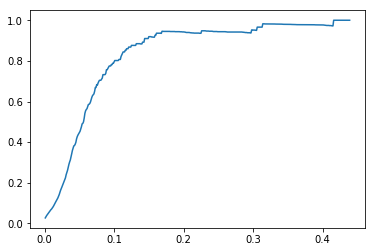

In [17]:
%pylab inline
plt.plot(thresholds,p)
for i in range(0,98):
    if p[i]==max(p): print ("最大准确率阈值",thresholds[i])
    
print ("最大准确率：",max(p))